# 🌌 Spaceship My Starter Model

Hello... 

### File and Data Field Descriptions

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.

* PassengerId - Id for each passenger in the test set.
* Transported - The target. For each passenger, predict either True or False.

# Loading Libraries...

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Seeting Notebook Parameters...

In [2]:
%%time
# I like to disable my Notebook Warnings.
import warnings
warnings.filterwarnings('ignore')

CPU times: user 36 µs, sys: 5 µs, total: 41 µs
Wall time: 45.5 µs


In [3]:
%%time
# Notebook Configuration...

# Amount of data we want to load into the Model...
DATA_ROWS = None
# Dataframe, the amount of rows and cols to visualize...
NROWS = 50
NCOLS = 15
# Main data location path...
BASE_PATH = '...'

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [4]:
%%time
# Configure notebook display settings to only use 2 decimal places, tables look nicer.
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', NCOLS) 
pd.set_option('display.max_rows', NROWS)

CPU times: user 0 ns, sys: 85 µs, total: 85 µs
Wall time: 89.4 µs


# Loading Information from CSV...

In [5]:
%%time
trn_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
tst_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

CPU times: user 43.4 ms, sys: 4.23 ms, total: 47.6 ms
Wall time: 86.1 ms


# Exploring the Information Available...

In [6]:
%%time
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
CPU times: user 14.2 ms, sys: 28 µs, total: 14.2 ms
Wall time: 24.9 ms


In [7]:
%%time
trn_data.head()

CPU times: user 108 µs, sys: 18 µs, total: 126 µs
Wall time: 130 µs


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,"3,576.00",0.00,"6,715.00",49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,"1,283.00",371.00,"3,329.00",193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [8]:
%%time
trn_data.describe()

CPU times: user 16.2 ms, sys: 1.03 ms, total: 17.2 ms
Wall time: 18.9 ms


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,"8,514.00","8,512.00","8,510.00","8,485.00","8,510.00","8,505.00"
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,"1,611.49",604.70,"1,136.71","1,145.72"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,"14,327.00","29,813.00","23,492.00","22,408.00","24,133.00"


In [9]:
%%time
def describe_categ(df):
    for col in df.columns:
        unique_samples = list(df[col].unique())
        unique_values = df[col].nunique()

        print(f' {col}: {unique_values} Unique Values,  Data Sample >> {unique_samples[:5]}')
    print(' ...')
    return None

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


In [10]:
%%time
describe_categ(trn_data)

 PassengerId: 8693 Unique Values,  Data Sample >> ['0001_01', '0002_01', '0003_01', '0003_02', '0004_01']
 HomePlanet: 3 Unique Values,  Data Sample >> ['Europa', 'Earth', 'Mars', nan]
 CryoSleep: 2 Unique Values,  Data Sample >> [False, True, nan]
 Cabin: 6560 Unique Values,  Data Sample >> ['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P']
 Destination: 3 Unique Values,  Data Sample >> ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan]
 Age: 80 Unique Values,  Data Sample >> [39.0, 24.0, 58.0, 33.0, 16.0]
 VIP: 2 Unique Values,  Data Sample >> [False, True, nan]
 RoomService: 1273 Unique Values,  Data Sample >> [0.0, 109.0, 43.0, 303.0, 42.0]
 FoodCourt: 1507 Unique Values,  Data Sample >> [0.0, 9.0, 3576.0, 1283.0, 70.0]
 ShoppingMall: 1115 Unique Values,  Data Sample >> [0.0, 25.0, 371.0, 151.0, 3.0]
 Spa: 1327 Unique Values,  Data Sample >> [0.0, 549.0, 6715.0, 3329.0, 565.0]
 VRDeck: 1306 Unique Values,  Data Sample >> [0.0, 44.0, 49.0, 193.0, 2.0]
 Name: 8473 Unique Values,  Data S

In [11]:
%%time
describe_categ(tst_data)

 PassengerId: 4277 Unique Values,  Data Sample >> ['0013_01', '0018_01', '0019_01', '0021_01', '0023_01']
 HomePlanet: 3 Unique Values,  Data Sample >> ['Earth', 'Europa', 'Mars', nan]
 CryoSleep: 2 Unique Values,  Data Sample >> [True, False, nan]
 Cabin: 3265 Unique Values,  Data Sample >> ['G/3/S', 'F/4/S', 'C/0/S', 'C/1/S', 'F/5/S']
 Destination: 3 Unique Values,  Data Sample >> ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan]
 Age: 79 Unique Values,  Data Sample >> [27.0, 19.0, 31.0, 38.0, 20.0]
 VIP: 2 Unique Values,  Data Sample >> [False, nan, True]
 RoomService: 842 Unique Values,  Data Sample >> [0.0, 10.0, 339.0, 932.0, 2.0]
 FoodCourt: 902 Unique Values,  Data Sample >> [0.0, 9.0, 6652.0, 1615.0, nan]
 ShoppingMall: 715 Unique Values,  Data Sample >> [0.0, 635.0, 263.0, 136.0, nan]
 Spa: 833 Unique Values,  Data Sample >> [0.0, 2823.0, 181.0, 113.0, 237.0]
 VRDeck: 796 Unique Values,  Data Sample >> [0.0, 585.0, 60.0, 1010.0, 224.0]
 Name: 4176 Unique Values,  Data Samp

In [12]:
trn_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
tst_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,"2,823.00",0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,"6,652.00",0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [14]:
tst_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [15]:
sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# Exploring the Target Variable...

In [16]:
%%time
def analyze_categ_target(df, target = 'Transported'):
    
    transported = df[df[target] == True].shape[0]
    not_transported = df[df[target] == False].shape[0]
    total = transported + not_transported
    
    print(f'Transported     : {transported / total:.2f} %')
    print(f'Not Transported : {not_transported / total:.2f} %')
    print(f'Total Passengers: {total}')
    print('...')

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs


In [17]:
%%time
analyze_categ_target(trn_data)

Transported     : 0.50 %
Not Transported : 0.50 %
Total Passengers: 8693
...
CPU times: user 3.8 ms, sys: 131 µs, total: 3.93 ms
Wall time: 6.07 ms


In [18]:
%%time
trn_passenger_ids = set(trn_data['PassengerId'].unique())
tst_passenger_ids = set(tst_data['PassengerId'].unique())
intersection = trn_passenger_ids.intersection(tst_passenger_ids)
print('Overlapped Passengers:', len(intersection))

Overlapped Passengers: 0
CPU times: user 3.47 ms, sys: 0 ns, total: 3.47 ms
Wall time: 3.48 ms


# Feature Engineering

In [19]:
def fill_missing(df):
    '''
    
    '''
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_tmp = df.select_dtypes(include = numerics)
    categ_tmp = df.select_dtypes(exclude = numerics)

    for col in numeric_tmp.columns:
        print(col)
        df[col] = df[col].fillna(value = df[col].mean())
        
    for col in categ_tmp.columns:
        print(col)
        df[col] = df[col].fillna(value = df[col].mode()[0])
        
    print('...')
    
    return df

In [20]:
trn_data =  fill_missing(trn_data)
tst_data =  fill_missing(tst_data)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
Transported
...
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
...


In [21]:
%%time
def total_billed(df):
    '''
    Calculates total amount billed in the trip to the passenger... 
    
    '''
    
    df['Total_Billed'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    return df

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


In [22]:
%%time
trn_data = total_billed(trn_data)
tst_data = total_billed(tst_data)

CPU times: user 2.9 ms, sys: 0 ns, total: 2.9 ms
Wall time: 2.91 ms


In [23]:
def name_ext(df):
    '''
    '''
    df['FirstName'] = df['Name'].str.split(' ', expand=True)[0]
    df['FamilyName'] = df['Name'].str.split(' ', expand=True)[1]
    df.drop(columns = ['Name'], inplace = True)
    return df

In [24]:
%%time
trn_data = name_ext(trn_data)
tst_data = name_ext(tst_data)

CPU times: user 139 ms, sys: 2.96 ms, total: 142 ms
Wall time: 142 ms


In [25]:
def cabin_separation(df):
    '''
    '''
    df['CabinDeck'] = df['Cabin'].str.split('/', expand=True)[0]
    df['CabinNum'] = df['Cabin'].str.split('/', expand=True)[1]
    df['CabinSide'] = df['Cabin'].str.split('/', expand=True)[2]
    df.drop(columns = ['Cabin'], inplace = True)
    return df

In [26]:
%%time
trn_data = cabin_separation(trn_data)
tst_data = cabin_separation(tst_data)

CPU times: user 51.3 ms, sys: 1.87 ms, total: 53.1 ms
Wall time: 53.2 ms


In [27]:
def route(df):
    '''
    
    '''
    df['Route'] = df['HomePlanet'] + df['Destination']
    return df

In [28]:
%%time
trn_data = route(trn_data)
tst_data = route(tst_data)

CPU times: user 2.74 ms, sys: 0 ns, total: 2.74 ms
Wall time: 2.76 ms


# Pre-Processing for Training

In [29]:
%%time
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_billed']

categorical_features = [
                        #'PassengerId',
                        'HomePlanet',
                        'CryoSleep',
                        'CabinDeck',
                        'CabinNum',
                        'CabinSide',
                        'Destination',
                        'VIP',
                        'FirstName',
                        'FamilyName',
                        'Route',
                        ]

target_feature = 'Transported'

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


In [30]:
%%time
from sklearn.preprocessing import LabelEncoder 

def encode_categorical(train_df, test_df, categ_feat = categorical_features):
    '''
    
    '''
    encoder_dict = {}
    
    concat_data = pd.concat([trn_data[categ_feat], tst_data[categ_feat]])
    
    for col in concat_data.columns:
        print('Processing: ', col)
        encoder = LabelEncoder()
        encoder.fit(concat_data[col])
        encoder_dict[col] = encoder

        train_df[col + '_Enc'] = encoder.transform(train_df[col])
        test_df[col + '_Enc'] = encoder.transform(test_df[col])
    
    train_df = train_df.drop(columns = categ_feat, axis = 1)
    test_df = test_df.drop(columns = categ_feat, axis = 1)

    return train_df, test_df

CPU times: user 459 ms, sys: 337 ms, total: 796 ms
Wall time: 961 ms


In [31]:
%%time
trn_data, tst_data = encode_categorical(trn_data, tst_data, categorical_features)

Processing:  HomePlanet
Processing:  CryoSleep
Processing:  CabinDeck
Processing:  CabinNum
Processing:  CabinSide
Processing:  Destination
Processing:  VIP
Processing:  FirstName
Processing:  FamilyName
Processing:  Route
CPU times: user 61.2 ms, sys: 4.05 ms, total: 65.3 ms
Wall time: 63.7 ms


# Simple CV Sttrategy 80/20 Split

In [32]:
trn_data.columns

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'Total_Billed', 'HomePlanet_Enc',
       'CryoSleep_Enc', 'CabinDeck_Enc', 'CabinNum_Enc', 'CabinSide_Enc',
       'Destination_Enc', 'VIP_Enc', 'FirstName_Enc', 'FamilyName_Enc',
       'Route_Enc'],
      dtype='object')

In [33]:
features = ['Age',
            'RoomService',
            'FoodCourt',
            'ShoppingMall',
            'Spa',
            'VRDeck',
            'FamilyName_Enc',
            'FirstName_Enc',
            'VIP_Enc',
            'Total_Billed',
            'HomePlanet_Enc',
            'CryoSleep_Enc',
            'CabinNum_Enc',
            'CabinSide_Enc',
            'CabinDeck_Enc',
            'Destination_Enc',
            'Route_Enc']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trn_data[features], trn_data[target_feature], test_size = 0.15, random_state = 42)

fit(X, y, *, sample_weight=None, base_margin=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None, sample_weight_eval_set=None, base_margin_eval_set=None, feature_weights=None, callbacks=None)

In [35]:
from xgboost import XGBClassifier
# cls = XGBClassifier(
#                     learning_rate = 0.1,
#                     n_estimators = 2048,
#                     n_jobs = -1)

cls = XGBClassifier()
cls.fit(X_train, y_train, eval_set = [(X_val, y_val)], eval_metric=['logloss'], early_stopping_rounds = 50, verbose = 10)

[0]	validation_0-logloss:0.58481
[10]	validation_0-logloss:0.41797
[20]	validation_0-logloss:0.41558
[30]	validation_0-logloss:0.41448
[40]	validation_0-logloss:0.41666
[50]	validation_0-logloss:0.41778
[60]	validation_0-logloss:0.42037
[70]	validation_0-logloss:0.42197
[78]	validation_0-logloss:0.42457


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
import matplotlib.pyplot as plt

def feature_importance(clf):
    importances = clf.feature_importances_
    i = np.argsort(importances)
    features = X_train.columns
    plt.title('Feature Importance')
    plt.barh(range(len(i)), importances[i], align='center')
    plt.yticks(range(len(i)), [features[x] for x in i])
    plt.xlabel('Scale')
    plt.show()

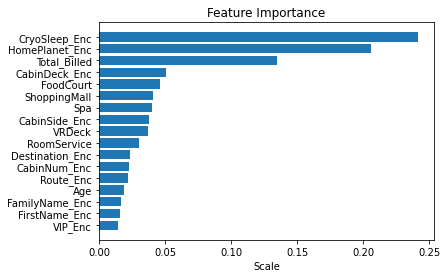

In [37]:
feature_importance(cls)

In [38]:
from sklearn.metrics import accuracy_score
val_preds = cls.predict(X_val[features])
accuracy = accuracy_score(val_preds, y_val)

In [39]:
accuracy

0.8006134969325154

In [40]:
# 0.7875766871165644
# 0.7883435582822086
# 0.7944785276073619
# 0.7998466257668712
# 0.8006134969325154

In [41]:
tst_data.shape

(4277, 18)

In [42]:
len(val_preds)

1304

In [43]:
sub.shape

(4277, 2)

In [44]:
preds = cls.predict(tst_data[features])

In [45]:
sub['Transported'] = preds
sub

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [46]:
sub.to_csv('submission.csv', index=False)

In [47]:
%%time
from sklearn.preprocessing import MinMaxScaler

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 14.1 µs


In [48]:
%%time
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

CPU times: user 469 ms, sys: 68.4 ms, total: 537 ms
Wall time: 913 ms


In [49]:
%%time
N_SPLITS = 5
folds = StratifiedKFold(n_splits = N_SPLITS, shuffle = True)

CPU times: user 36 µs, sys: 5 µs, total: 41 µs
Wall time: 45.3 µs


In [50]:
%%time

n_estimators = 2373
max_depth = 3691
min_samples_split = 3
min_samples_leaf = 1
criterion = 'gini'

scores  = []
y_probs = []

for fold, (trn_id, val_id) in enumerate(folds.split(trn_data[features], trn_data[target_feature])):  
    X_train, y_train = trn_data[features].iloc[trn_id], trn_data[target_feature].iloc[trn_id]
    X_valid, y_valid = trn_data[features].iloc[val_id], trn_data[target_feature].iloc[val_id]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    
#     model = ExtraTreesClassifier(n_estimators = n_estimators,
#                                  max_depth = max_depth,
#                                  min_samples_split = min_samples_split,
#                                  min_samples_leaf = min_samples_leaf,
#                                  criterion = criterion,
#                                  random_state = 69,
#                                  n_jobs = -1)
    
    model = XGBClassifier()
    
    
    model.fit(X_train, y_train)
    
    valid_pred = model.predict(X_valid)
    valid_score = accuracy_score(y_valid, valid_pred)
    
    print("Fold:", fold, "Accuracy:", valid_score)
    scores.append(valid_score)
    y_probs.append(model.predict_proba(tst_data[features]))

[05:30:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold: 0 Accuracy: 0.8016101207590569
[05:31:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold: 1 Accuracy: 0.7987349051178838
[05:31:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold: 2 Accuracy: 0.7964347326049454
[05:31:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:

In [51]:
%%time
print("Mean accuracy score:", np.array(scores).mean())

Mean accuracy score: 0.7966171714892425
CPU times: user 307 µs, sys: 15 µs, total: 322 µs
Wall time: 247 µs


In [52]:
y_prob = sum(y_probs) / len(y_probs)

In [53]:
y_prob

array([[0.04997068, 0.95002925],
       [0.8713997 , 0.12860033],
       [0.00910618, 0.99089384],
       ...,
       [0.0843977 , 0.9156023 ],
       [0.74460304, 0.2553969 ],
       [0.04997068, 0.95002925]], dtype=float32)

In [54]:
y_prob_inv = 1 - y_prob

In [55]:
y_prob_inv

array([[0.9500293 , 0.04997075],
       [0.1286003 , 0.87139964],
       [0.99089384, 0.00910616],
       ...,
       [0.9156023 , 0.08439767],
       [0.25539696, 0.7446031 ],
       [0.9500293 , 0.04997075]], dtype=float32)

In [56]:
y_prob_results = np.argmax(y_prob, axis = 1)
y_prob_results = (y_prob_results - 1) * - 1 
y_prob_results = y_prob_results.astype('bool')
y_prob_results

array([False,  True, False, ..., False,  True, False])

In [57]:
sub['Transported'] = y_prob_results
sub.to_csv('submission_cv_loop.csv', index=False)